<a href="https://colab.research.google.com/github/BrianGisemba/MENTAL-HEALTH-TWEETS-CLASSIFICATION/blob/main/Multi_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Impoet wandb 
!pip install wandb

import wandb

In [ ]:
wandb.login()

True

In [3]:
# Load the libraries needed 
!pip install tensorflow-gpu==2.0.0
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

     |████████████████████████████████| 380.8 MB 34 kB/s 
     |████████████████████████████████| 449 kB 59.1 MB/s 
     |████████████████████████████████| 50 kB 4.8 MB/s 
     |████████████████████████████████| 3.8 MB 41.4 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=8b80dcb08b4379526db9c0b7c025a5003dad1cbff22833fb20d0e2b7e6044108
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

# Load the data

In [4]:
# Read the CSV 
df = pd.read_csv('/content/MentalHealth_Aug (1).csv')

# preview the df
df.head(5)

,Unnamed: 0,tweet,disorder,clean_tweet,clean_tweet_tok
0,0,not suicidal or anything but sometimes i look ...,7,suicidal anything sometimes look vast world no...,"['suicidal', 'anything', 'sometimes', 'look', ..."
1,1,need more clothes \nscreams in anxiety,0,need clothes screams anxiety,"['need', 'clothes', 'screams', 'anxiety']"
2,2,sam _ unk lulli fidel _ ke huyu ni embaramb...,6,sam _ unk lulli fidel _ ke huyu embarambamba w...,"['sam', '_', 'unk', 'lulli', 'fidel', '_', 'ke..."
3,3,learn how to cope depression and traumatic con...,4,learn cope depression traumatic condition nd a...,"['learn', 'cope', 'depression', 'traumatic', '..."
4,4,at our current research labs weve looked at th...,1,current research labs weve looked cognitive gr...,"['current', 'research', 'labs', 'weve', 'looke..."


In [ ]:
# Read the columns
df.columns

Index(['Unnamed: 0', 'tweet', 'disorder', 'clean_tweet', 'clean_tweet_tok'], dtype='object')

In [ ]:
df.head(1)

,Unnamed: 0,tweet,disorder,clean_tweet,clean_tweet_tok
0,0,not suicidal or anything but sometimes i look ...,7,suicidal anything sometimes look vast world no...,"['suicidal', 'anything', 'sometimes', 'look', ..."


# Spliting the data

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
# Defining the features and labels

X = df['clean_tweet']
y = df['disorder']

In [ ]:
# Splitting the data into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# running the TFIDF 

tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Modelling  

## naive_bayes

In [ ]:
wandb.init (project = 'Multi_Model')

_runtime,10
_timestamp,1629324885
_step,6


_runtime,▁▄▄████
_timestamp,▁▄▄████
_step,▁▂▃▅▆▇█


In [ ]:
# Creating target labels
targets = ['depression', 'suicide', 'bipolar', 'dementia','anxiety','autism', 'schizophrenia', 'paranoia' ]
targets

['depression',
 'suicide',
 'bipolar',
 'dementia',
 'anxiety',
 'autism',
 'schizophrenia',
 'paranoia']

In [ ]:
from sklearn.metrics import log_loss, accuracy_score
from wandb.keras import WandbCallback

In [ ]:
# MultinomialNB

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

feature_names = ['Tweets']
labels = targets
#predict 
y_pred_nb = nb.predict(X_test_tfidf)

# Predicting Probabilities. 

y_probas = nb.predict_log_proba(X_test_tfidf)

# Log into wandb
wandb.sklearn.plot_classifier(nb, X_train_tfidf, X_test_tfidf, y_train, y_test, y_pred_nb, y_probas, labels,
                                                         model_name='NB', feature_names=None)


wandb: 
wandb: Plotting NB.
wandb: Logged feature importances.
wandb: Logged learning curve.
wandb: Logged confusion matrix.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: Logged calibration curve.
wandb: Logged roc curve.
wandb: Logged precision recall curve.


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf,y_train)

wandb.init (project = 'Multi_Model')
#predict 
y_pred_log = nb.predict(X_test_tfidf)

# Predicting Probabilities. 

y_probas = nb.predict_log_proba(X_test_tfidf)

# Log into wandb
wandb.sklearn.plot_regressor(log, X_train_tfidf, X_test_tfidf, y_train, y_test,  model_name='Logistic')

_runtime,23
_timestamp,1629324916
_step,6


_runtime,▁▄▅▇▇▇█
_timestamp,▁▄▅▇▇▇█
_step,▁▂▃▅▆▇█


wandb: 
wandb: Plotting Logistic.
wandb: Logged summary metrics.
wandb: Logged learning curve.
wandb: ERROR regressor is not a regressor. Please try again.
wandb: Logged outlier candidates.
wandb: ERROR regressor is not a regressor. Please try again.
wandb: Logged residuals.


### Support Vector (Linear SVC)

In [ ]:
# Support Vector (Linear SVC)

from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

wandb.init (project = 'Multi_Model')

feature_names = ['Tweets']
labels = targets
#predict 
y_pred_svc = svc.predict(X_test_tfidf)

# Predicting Probabilities. 

# y_probas = svc.predict_log_proba(X_test_tfidf)

# Log into wandb
wandb.sklearn.plot_classifier(svc, X_train_tfidf, X_test_tfidf, y_train, y_test, , yy_pred_svc, labels,
                                                         model_name='SVC', feature_names=None)

_runtime,7
_timestamp,1629325286
_step,2


_runtime,▁██
_timestamp,▁██
_step,▁▅█


TypeError: ignored

# Metrics

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [ ]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

## Naive Bayes

NB MODEL
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        68
           1       0.88      1.00      0.94        52
           2       0.93      0.96      0.94        53
           3       0.95      1.00      0.97        52
           4       0.81      0.67      0.74        64
           5       0.97      1.00      0.99        69
           6       1.00      1.00      1.00        60
           7       0.94      0.98      0.96        62

    accuracy                           0.91       480
   macro avg       0.91      0.92      0.91       480
weighted avg       0.91      0.91      0.91       480



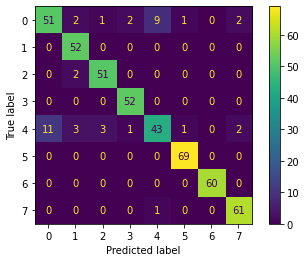

In [ ]:
print("NB MODEL")
report(nb)

## Logistic Regression

Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        68
           1       0.95      1.00      0.97        52
           2       0.94      0.96      0.95        53
           3       0.98      1.00      0.99        52
           4       0.82      0.80      0.81        64
           5       1.00      1.00      1.00        69
           6       1.00      1.00      1.00        60
           7       0.98      0.98      0.98        62

    accuracy                           0.94       480
   macro avg       0.94      0.95      0.94       480
weighted avg       0.94      0.94      0.94       480



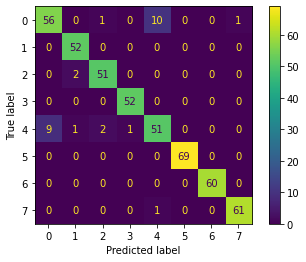

In [ ]:
print("Logistic Regression")
report(log)

## SVC

SVC
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        68
           1       0.95      1.00      0.97        52
           2       0.96      0.96      0.96        53
           3       0.98      1.00      0.99        52
           4       0.81      0.78      0.79        64
           5       1.00      1.00      1.00        69
           6       1.00      1.00      1.00        60
           7       0.97      0.98      0.98        62

    accuracy                           0.94       480
   macro avg       0.94      0.94      0.94       480
weighted avg       0.94      0.94      0.94       480



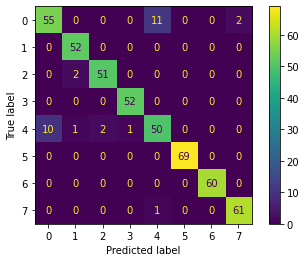

In [ ]:
print('SVC')
report(svc)